In [132]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [133]:
np.random.seed(0)

In [134]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [135]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [136]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28, 28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimensions of the images are not 28x28"

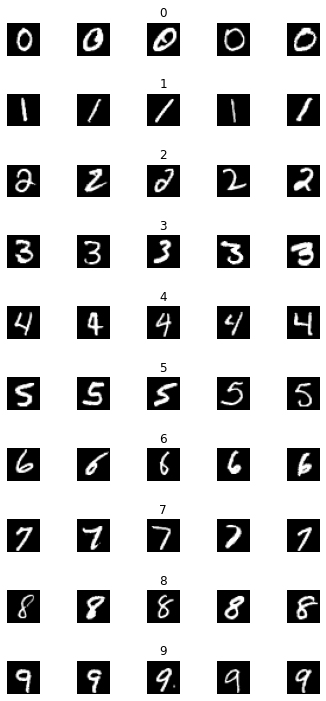

In [137]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

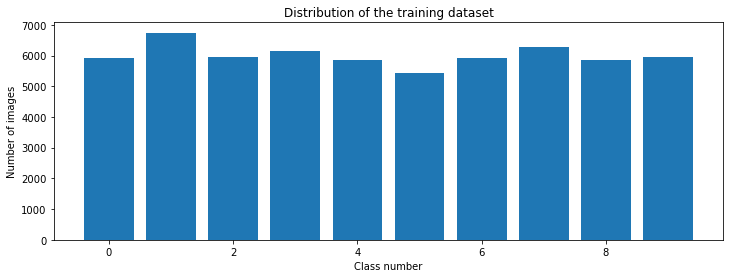

In [138]:
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [139]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [140]:
X_train = X_train/255
X_test = X_test/255

In [141]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [142]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim = num_pixels, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [143]:
model = create_model()
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________
None


In [144]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)


Epoch 1/10
270/270 [==============================] - 1s 3ms/step - loss: 1.4245 - accuracy: 0.4494 - val_loss: 1.0449 - val_accuracy: 0.5950
Epoch 2/10
270/270 [==============================] - 1s 2ms/step - loss: 1.0891 - accuracy: 0.5968 - val_loss: 0.9938 - val_accuracy: 0.6282
Epoch 3/10
270/270 [==============================] - 1s 2ms/step - loss: 1.0495 - accuracy: 0.6237 - val_loss: 0.9758 - val_accuracy: 0.6523
Epoch 4/10
270/270 [==============================] - 1s 2ms/step - loss: 1.0148 - accuracy: 0.6442 - val_loss: 0.9466 - val_accuracy: 0.6685
Epoch 5/10
270/270 [==============================] - 1s 2ms/step - loss: 0.9931 - accuracy: 0.6568 - val_loss: 0.9124 - val_accuracy: 0.6910
Epoch 6/10
270/270 [==============================] - 1s 2ms/step - loss: 0.9651 - accuracy: 0.6747 - val_loss: 0.8690 - val_accuracy: 0.7137
Epoch 7/10
270/270 [==============================] - 1s 2ms/step - loss: 0.9354 - accuracy: 0.6887 - val_loss: 0.8653 - val_accuracy: 0.7230
Epoch 

Text(0.5, 0, 'epoch')

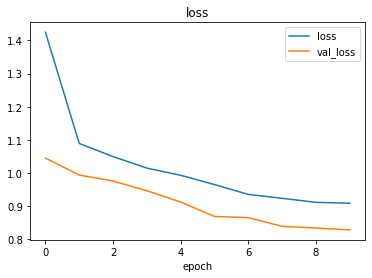

In [145]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

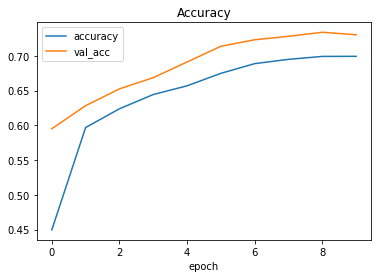

In [146]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [147]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test score', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score 0.897003710269928
Test accuracy: 0.708899974822998


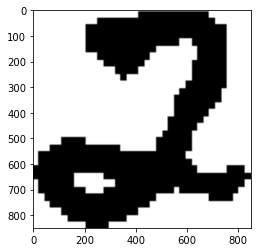

In [148]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

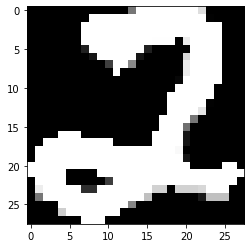

In [152]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))

In [153]:
image = image/255
image = image.reshape(1, 784)

In [154]:
prediction = model.predict_classes(image)
print("predicted digit:", str(prediction))

predicted digit: [2]
